In [2]:
import sqlite3
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
conn = sqlite3.connect('/Users/yortos/Library/Messages/chat.db')

cur = conn.cursor()
cur.execute(" select name from sqlite_master where type = 'table' ")

for name in cur.fetchall():
    print(name)

('_SqliteDatabaseProperties',)
('message',)
('sqlite_sequence',)
('chat',)
('attachment',)
('handle',)
('message_attachment_join',)
('chat_handle_join',)
('chat_message_join',)


In [4]:
cur = conn.cursor()
cur.execute(" select * from message")

messages = pd.read_sql_query("select *, date + 978307200 - 5*60*60  as date_est from message", conn)
chats = pd.read_sql_query("select * from chat", conn)
handles = pd.read_sql_query("select * from handle", conn)
chat_handle_joins = pd.read_sql_query("select * from chat_handle_join", conn)
chat_message_joins = pd.read_sql_query("select * from chat_message_join", conn)

messages['timestamp'] = messages['date_est'].apply(lambda x: pd.Timestamp(datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')))
messages['date'] = messages['timestamp'].apply(lambda x: x.date())
messages['month'] = messages['timestamp'].apply(lambda x: int(x.month))
messages['year'] = messages['timestamp'].apply(lambda x: int(x.year))



#messages.rename(columns={'handle_id' : 'sender_id'}, inplace = True)
messages.rename(columns={'ROWID' : 'message_id'}, inplace = True)

handles.rename(columns={'id' : 'phone_number', 'ROWID': 'handle_id'}, inplace = True)


In [40]:
temp = pd.merge(messages[['text', 'handle_id', 'date', 'timestamp', 'month','year','is_sent', 'message_id']],  handles[['handle_id', 'phone_number']], on ='handle_id', how='left')

df_messages = pd.merge(temp, chat_message_joins, on = 'message_id', how='left')


print(len(df_messages))
#df_messages.head()


94943


## data exploration

In [7]:
df_messages['date'].min(), df_messages['date'].max()

(datetime.date(2014, 12, 2), datetime.date(2019, 3, 4))

(array([ 735599.,  735780.,  735964.,  736146.,  736330.,  736511.,
         736695.,  736876.,  737060.]), <a list of 9 Text xticklabel objects>)

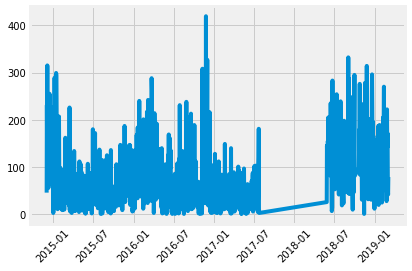

In [33]:
plt.plot(df_messages.groupby('date').size())
#plt.xlim((pd.Timestamp('2017-08-01'), pd.Timestamp('2018-07-01')))
plt.xticks(rotation='45')

In [35]:
df_messages.groupby('is_sent').size()

is_sent
0    53993
1    40950
dtype: int64

In [36]:
df_messages.groupby('month').size()

month
1     11565
2      8353
3      7110
4      5264
5      3941
6      8609
7      9519
8      6812
9      6910
10     4750
11     9404
12    12706
dtype: int64

In [39]:
df_messages.groupby('month')['is_sent'].mean()

month
1     0.442974
2     0.424279
3     0.431646
4     0.405205
5     0.414362
6     0.431874
7     0.423049
8     0.433647
9     0.436179
10    0.426947
11    0.423969
12    0.450181
Name: is_sent, dtype: float64